In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

In [49]:
# a simple method to draw the graph and the centrality metrics of nodes with a heat map.

def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    node_ids = {node: str(node) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_ids, font_size=12, font_color='black')

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

Zachary’s Karate Club graph is defined as the example graph G. It is basically a social network of members of an university karate club, where undirected edges connects people who interact outside the club.

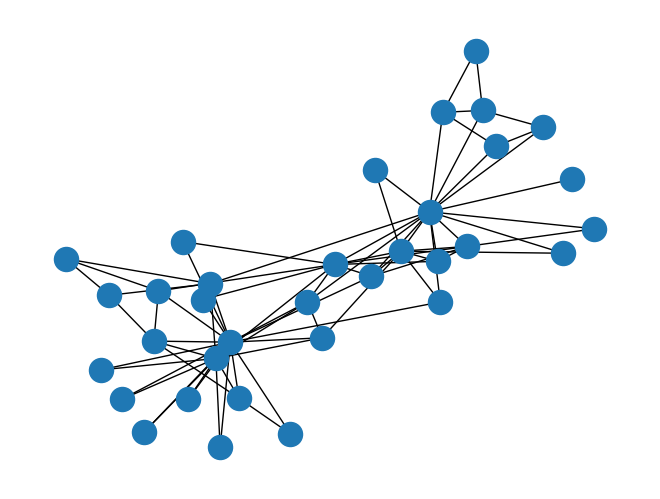

In [50]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos)

We also need a directed graph to demonstrate some other centrality measures.

In [51]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
#dpos = nx.spring_layout(G, seed=675)
dpos = {
    1: [0.1, 0.9],  2: [0.4, 0.8],  3: [0.8, 0.9],
    4: [0.15, 0.55], 5: [0.5, 0.5], 6: [0.8, 0.5],
    7: [0.22, 0.3],  8: [0.30, 0.27], 9: [0.38, 0.24],
    10: [0.7, 0.3], 11: [0.75, 0.35]
}



In [52]:
import pandas as pd
import networkx as nx
import numpy as np

# Load the edge list from the cora.cites file.
# The file is tab-separated and has no header.
# We name the columns 'target' and 'source' to represent citations.
data_dir = "data/cora/"
edges = pd.read_csv(data_dir + "cora.cites", sep='\t', header=None, names=['target', 'source'])

#Load the node content from the cora.content file.
# This file is also tab-separated and has no header.
# The first column is the node ID, the middle columns are features, and the last is the label.
nodes = pd.read_csv(data_dir + "cora.content", sep='\t', header=None)

# Convert node IDs in both DataFrames to strings for consistency.
# This prevents potential issues when using them as graph node identifiers.
edges['source'] = edges['source'].astype(str)
edges['target'] = edges['target'].astype(str)
nodes[0] = nodes[0].astype(str) # Column 0 contains the node IDs in the nodes DataFrame


# Create a directed graph (DiGraph) from the edges DataFrame.
# The 'source' column indicates the citing paper, and the 'target' column is the cited paper.
G_cora = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.DiGraph())

# Add node features and labels
# Iterate through each row in the nodes DataFrame.
for _, row in nodes.iterrows():
    # Get the node ID (first column).
    node_id = row[0]
    # Extract the feature vector (all columns except the first and last).
    features = np.array(row[1:-1], dtype=int)
    # Get the class label (last column).
    label = row.iloc[-1]

    # Check if the node ID exists in the graph (some nodes in cora.content might not be in cora.cites).
    if node_id in G_cora:
        # Add the 'feature' and 'label' as attributes to the node in the graph.
        G_cora.nodes[node_id]['feature'] = features
        G_cora.nodes[node_id]['label'] = label


In [53]:
edges.head()

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


#**Degree Centrality**

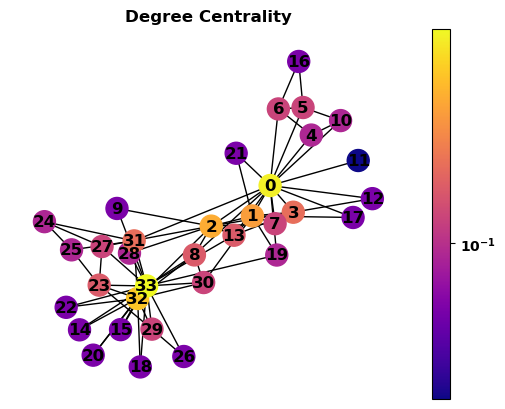

{33: 0.5151515151515151, 0: 0.48484848484848486, 32: 0.36363636363636365, 2: 0.30303030303030304, 1: 0.2727272727272727, 3: 0.18181818181818182, 31: 0.18181818181818182, 8: 0.15151515151515152, 13: 0.15151515151515152, 23: 0.15151515151515152, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 27: 0.12121212121212122, 29: 0.12121212121212122, 30: 0.12121212121212122, 4: 0.09090909090909091, 10: 0.09090909090909091, 19: 0.09090909090909091, 24: 0.09090909090909091, 25: 0.09090909090909091, 28: 0.09090909090909091, 9: 0.06060606060606061, 12: 0.06060606060606061, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 26: 0.06060606060606061, 11: 0.030303030303030304}


In [63]:
degree=nx.degree_centrality(G)
draw(G, pos, degree, 'Degree Centrality')

degrees = G.degree()

sorted_by_values = {k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)}
print(sorted_by_values)

Degree of a node is basically number of edges that it has. The basic intuition is that, nodes with more connections are more influential and important in a network. In other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.

For directed graphs, in-degree, number of incoming points, is considered as importance factor for nodes.

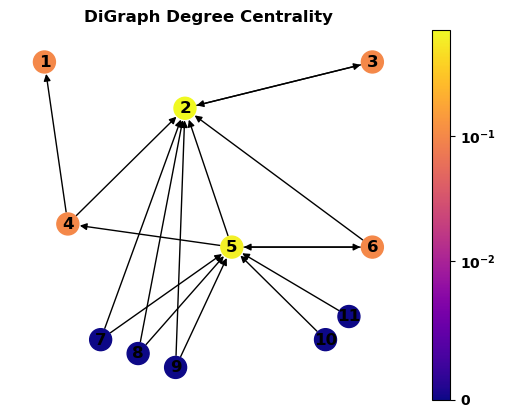

{5: 0.9, 2: 0.8, 4: 0.30000000000000004, 6: 0.30000000000000004, 3: 0.2, 7: 0.2, 8: 0.2, 9: 0.2, 1: 0.1, 10: 0.1, 11: 0.1}


In [65]:
draw(DiG, dpos, nx.in_degree_centrality(DiG), 'DiGraph Degree Centrality')
degree=nx.degree_centrality(DiG)
sorted_by_values = {k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)}
print(sorted_by_values)

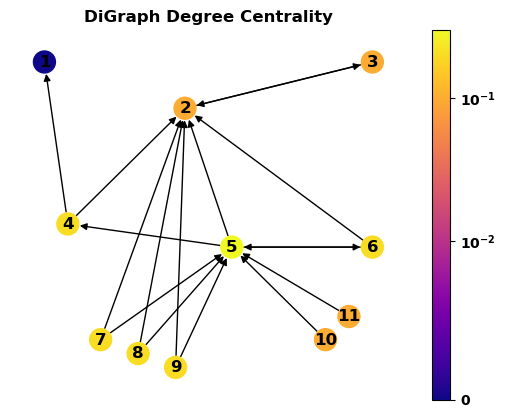

{5: 0.9, 2: 0.8, 4: 0.30000000000000004, 6: 0.30000000000000004, 3: 0.2, 7: 0.2, 8: 0.2, 9: 0.2, 1: 0.1, 10: 0.1, 11: 0.1}


In [67]:
draw(DiG, dpos, nx.out_degree_centrality(DiG), 'DiGraph Degree Centrality')
degree=nx.degree_centrality(DiG)
sorted_by_values = {k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)}
print(sorted_by_values)

{'1033': 0.0007388252678241596, '35': 0.06132249722940525, '103482': 0.001847063169560399, '103515': 0.0033247137052087182, '1050679': 0.0, '1103960': 0.0, '1103985': 0.0, '1109199': 0.0, '1112911': 0.0, '1113438': 0.0, '1113831': 0.0, '1114331': 0.0, '1117476': 0.0, '1119505': 0.0, '1119708': 0.0, '1120431': 0.0, '1123756': 0.0, '1125386': 0.0, '1127430': 0.0, '1127913': 0.0, '1128204': 0.0, '1128227': 0.0, '1128314': 0.0, '1128453': 0.0, '1128945': 0.0, '1128959': 0.0, '1128985': 0.0, '1129018': 0.0, '1129027': 0.0, '1129573': 0.0, '1129683': 0.0, '1129778': 0.0, '1130847': 0.0, '1130856': 0.0, '1131116': 0.0, '1131360': 0.0, '1131557': 0.0, '1131752': 0.0, '1133196': 0.0, '1133338': 0.0, '1136814': 0.0, '1137466': 0.0, '1152421': 0.0, '1152508': 0.0, '1153065': 0.0, '1153280': 0.0, '1153577': 0.0, '1153853': 0.0, '1153943': 0.0, '1154176': 0.0, '1154459': 0.0, '116552': 0.0007388252678241596, '12576': 0.007018840044329516, '128540': 0.0003694126339120798, '132806': 0.001108237901736

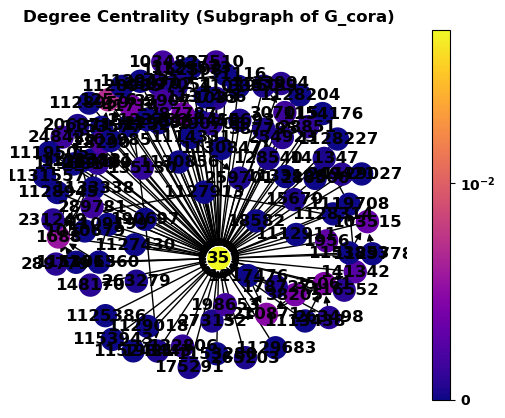

{'35': 1.0101010101010102, '210871': 0.08080808080808081, '1688': 0.06060606060606061, '35061': 0.05050505050505051, '103515': 0.05050505050505051, '12576': 0.05050505050505051, '41714': 0.05050505050505051, '287787': 0.05050505050505051, '289780': 0.04040404040404041, '273152': 0.030303030303030304, '415693': 0.030303030303030304, '128540': 0.030303030303030304, '259702': 0.030303030303030304, '141342': 0.030303030303030304, '1114331': 0.030303030303030304, '1136814': 0.030303030303030304, '1119708': 0.030303030303030304, '190697': 0.030303030303030304, '33907': 0.030303030303030304, '1128453': 0.030303030303030304, '289781': 0.030303030303030304, '1103960': 0.030303030303030304, '387795': 0.030303030303030304, '1127913': 0.030303030303030304, '1129573': 0.020202020202020204, '248425': 0.020202020202020204, '1113831': 0.020202020202020204, '198443': 0.020202020202020204, '198653': 0.020202020202020204, '1129778': 0.020202020202020204, '1113438': 0.020202020202020204, '1130856': 0.0202

In [69]:
# generate degree centrality for  G_cora

# **Degree Centrality for G_cora**
# Calculate in-degree centrality for the directed graph G_cora
degree_cora = nx.in_degree_centrality(G_cora)
# You can print the centrality values
print(degree_cora)

# Optional: If you want to visualize G_cora, you'll need to generate a layout.
# However, drawing a graph as large as Cora directly might not be feasible.
# You could sample a subgraph or visualize statistics instead.
# Example: Print the number of nodes and edges in G_cora
print(f"Number of nodes in G_cora: {G_cora.number_of_nodes()}")
print(f"Number of edges in G_cora: {G_cora.number_of_edges()}")

# If you still want to attempt drawing a smaller version or check for node positions,
# you could try:
#pos_cora = nx.spring_layout(G_cora) # This might take a very long time or crash for large graphs

#If you want to draw, consider drawing a smaller subset for demonstration:
sub_nodes = list(G_cora.nodes())[:100] # take first 100 nodes
sub_graph = G_cora.subgraph(sub_nodes)
pos_sub = nx.spring_layout(sub_graph)
draw(sub_graph, pos_sub, {node: degree_cora[node] for node in sub_graph.nodes()}, 'Degree Centrality (Subgraph of G_cora)')
degree=nx.degree_centrality(sub_graph)
sorted_by_values = {k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)}
print(sorted_by_values)

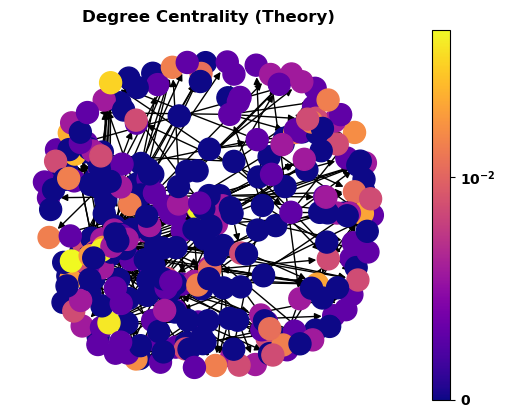

In [20]:
theory_nodes = [node for node, attributes in G_cora.nodes(data=True) if attributes.get('label') == 'Theory']

# Create a subgraph containing only the 'Theory' nodes and the edges between them
# This is more meaningful than just isolated nodes
theory_subgraph = G_cora.subgraph(theory_nodes)

#theory_degree_cora = {node: degree_cora[node] for node in theory_subgraph.nodes()}

pos_sub = nx.spring_layout(theory_subgraph)
draw(theory_subgraph, pos_sub, nx.in_degree_centrality(theory_subgraph), 'Degree Centrality (Theory)')

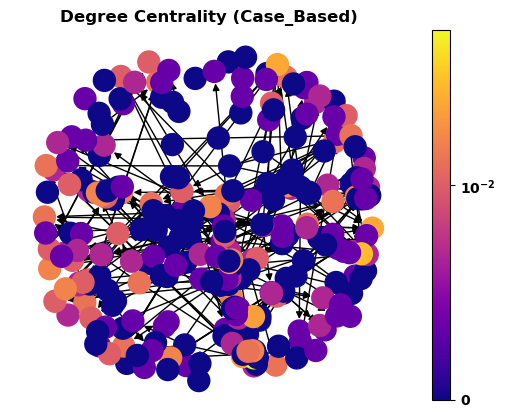

In [21]:
# similarly generate for nodes labelled as Case_Based

case_based_nodes = [node for node, attributes in G_cora.nodes(data=True) if attributes.get('label') == 'Case_Based']

# Create a subgraph containing only the 'Case_Based' nodes and the edges between them
case_based_subgraph = G_cora.subgraph(case_based_nodes)

pos_sub_case_based = nx.spring_layout(case_based_subgraph)
draw(case_based_subgraph, pos_sub_case_based, nx.in_degree_centrality(case_based_subgraph), 'Degree Centrality (Case_Based)')

#**Eigenvector Centrality**

Eigenvector centrality is a basic extension of degree centrality, which defines centrality of a node as proportional to its neighbors’ importance. When we sum up all connections of a node, not all neighbors are equally important. Let’s consider two nodes in a friend network with same degree, the one who is connected to more central nodes should be more central.


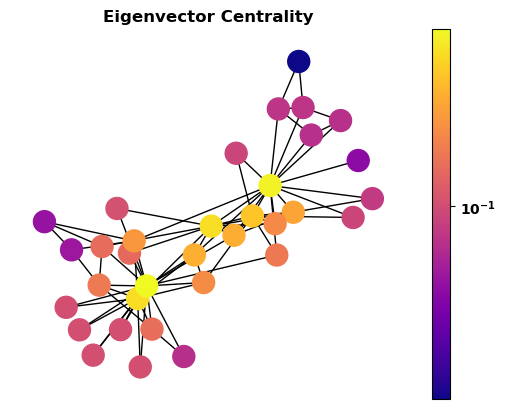

In [22]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')


The graph shows that the nodes which have the same number of connections are not necessarily in the same heat map color. The one that is connected to more central nodes are more hot in this visualization.

However, as we can see from the definition, it is a problematic measure for directed graphs. Let’s say that a new research paper is published and it references a handful of existing papers. It would not contribute to any of those referenced papers in this citation network because it is not cited by any other papers and has zero eigenvector centrality. In other words, eigenvector centrality would not take zero in-degree nodes into account in directed graphs such as citation networks.



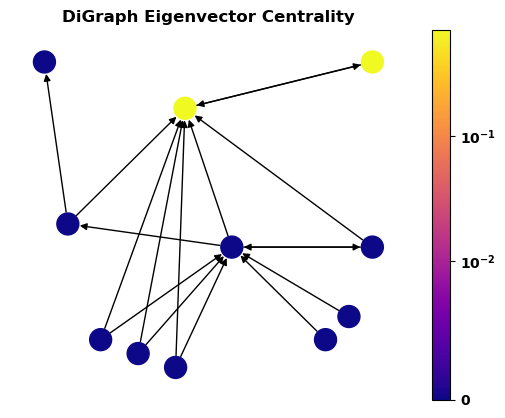

In [24]:
draw(DiG, dpos, nx.eigenvector_centrality_numpy(DiG), 'DiGraph Eigenvector Centrality')


Fix: `eigenvector_centrality` with Power Iteration (more stable)

NetworkX uses power iteration, which is an iterative numerical method to find the leading eigenvector of a matrix (which gives you the centralities).

Here's what it does internally:
1. Start with an initial guess: All nodes start with equal scores (e.g., 1.0).

2. Iteratively update scores: Each node's score is updated based on the scores of its neighbors.

3. Normalize the vector in each step to prevent overflow.

4. Repeat until the scores converge (difference between iterations < `tol`) or until `max_iter` is reached.



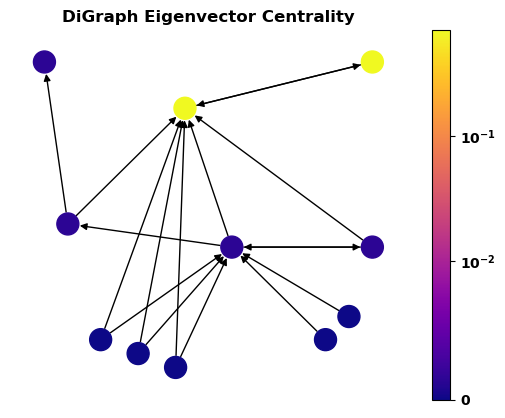

In [25]:
eigen_centrality = nx.eigenvector_centrality(DiG, max_iter=1000, tol=1e-06)
draw(DiG, dpos, eigen_centrality, 'DiGraph Eigenvector Centrality')


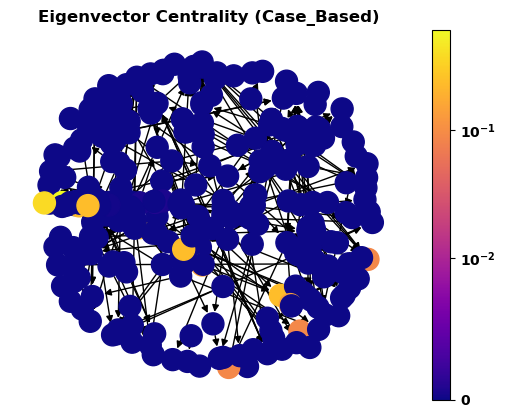

In [26]:
#generate for nodes labelled as Case_Based

case_based_nodes = [node for node, attributes in G_cora.nodes(data=True) if attributes.get('label') == 'Case_Based']

# Create a subgraph containing only the 'Case_Based' nodes and the edges between them
case_based_subgraph = G_cora.subgraph(case_based_nodes)

pos_sub_case_based = nx.spring_layout(case_based_subgraph)
draw(case_based_subgraph, pos_sub_case_based, nx.eigenvector_centrality(case_based_subgraph), 'Eigenvector Centrality (Case_Based)')

The nodes with brighter colors are the more influential papers or entities within the Case_Based category, based on how well they are connected to other influential papers within that specific field. These would be the papers that are cited by other important Case_Based papers.

*   **Brighter nodes:** These are the papers or entities that are highly influential within the 'Case_Based' research area, likely because they are cited frequently by other key papers in this field.
*   **Darker nodes:** These are papers or entities within the 'Case_Based' area that have less influence based on this metric. They might be cited less frequently by other important papers in the field.

Overall, this visualization helps identify the most central and potentially most impactful research within the 'Case_Based' category of the Cora dataset, according to the Eigenvector Centrality metric.

# **Katz Centrality**

Katz centrality introduces two positive constants α and β to tackle the problem of eigenvector centrality with zero in-degree nodes:


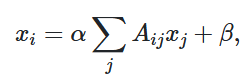




This β constant gives a free centrality contribution for all nodes even though they don’t get any contribution from other nodes. The existence of a node alone would provide it some importance.
α constant determines the balances between the contribution from other nodes and the free constant.



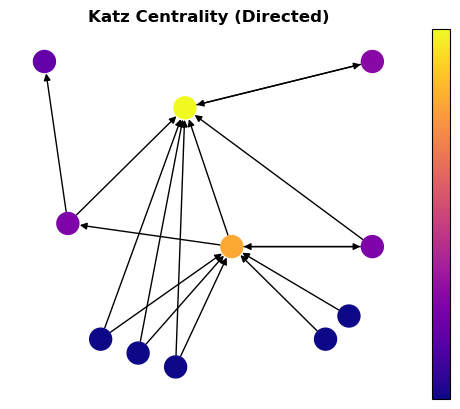

In [27]:
katz = nx.katz_centrality(DiG, alpha=0.1, beta=1.0, max_iter=1000)
draw(DiG, dpos, katz, 'Katz Centrality (Directed)')

# The out degree

**PageRank**

PageRank was introduced by the founders of Google to rank websites in search results. It can be considered as an extension of Katz centrality. The websites on the web can be modeled as a directed graph, where hypermedia links between websites determines the edges. Let’s consider a popular web directory website with high Katz centrality value which has millions of links to other websites. It would contribute to every single website significantly, nevertheless not all of them are important. To overcome that issue, contribution value is divided by out-degree of the node:


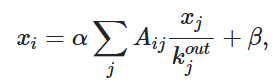



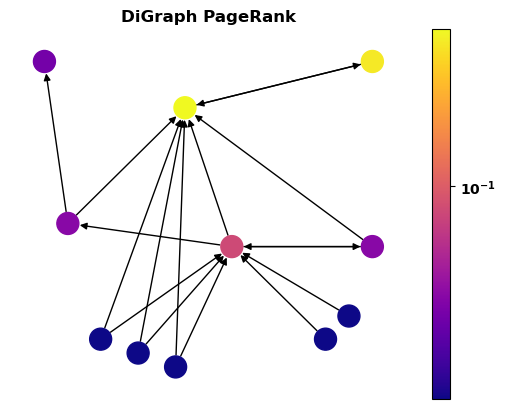

In [28]:
draw(DiG, dpos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')

# Why node 3 importance increased

As the drawing demonstrates, the nodes with fewer out-degree contributes way more to each node compared the Katz Centrality. Here the node at the top right gets only reference of a very important node, and it becomes way more important compared to the Katz Centrality; on the other hand, the node in the center which gets contribution from high out-degree nodes loses its importance.

#**Closeness Centrality**



It is a self-explanatory measure that determines each node’s importance based on how close it is to all other nodes in the network.

Let  $d_{ij}$ be the length of the **shortest path** between nodes $i$ and $j$.  
The average distance $l_i$ from node $i$ to all other nodes is:
$$l_i = \frac{1}{n} \sum_j d_{ij}$$


Since we are looking for nodes that are closer to others, the Closeness Centrality  $C_i$ is defined as the inverse of the average shortest path length:


$$C_i = \frac{1}{l_i} = \frac{n}{\sum_j d_{ij}}$$

---

- We assume an unweighted graph, so all edges have equal distance (weight = 1).
- This measure is useful to find nodes that can quickly reach others, such as the central distribution point in a delivery or communication network.


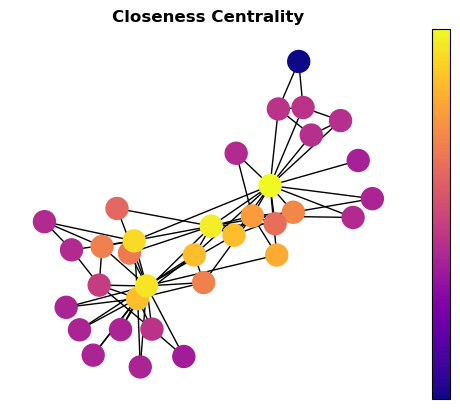

In [29]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')


In [30]:
#draw(DiG, dpos, nx.closeness_centrality(DiG), 'Closeness Centrality')


##Betweenness Centrality

It measures the importance of a node based on how many **shortest paths** pass through it.

Let:  
- $s$ be the **source** node,  
- $t$ be the **target** node,  
- $i$ be the node whose centrality we are measuring (where $s \ne t \ne i$),  
- $n^i_{st} = 1$ if node $i$ lies on a shortest path from $s$ to $t$, otherwise 0,  
- $g_{st}$ be the total number of shortest paths between $s$ and $t$.

Then the **betweenness centrality** $x_i$ is calculated as:

$$
x_i = \sum_{s \ne t \ne i} \frac{n^i_{st}}{g_{st}}
$$

---

- If there are **multiple shortest paths** between $s$ and $t$, then each path contributes **proportionally**.
- Nodes with high betweenness centrality act as **critical bridges** for information flow in the network.


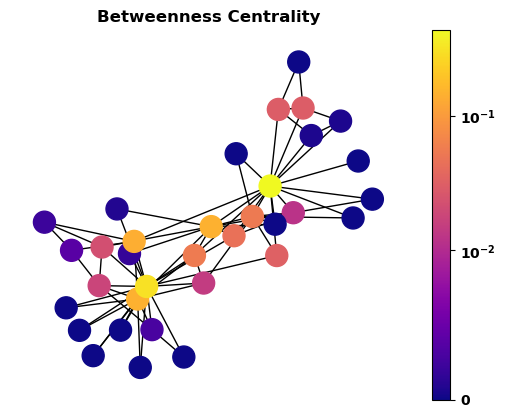

In [31]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')
